## 1 Load Data

In [209]:
import numpy as np
import pandas as pd

In [210]:
pd.set_option("display.max_columns", None)

data_path = "../data/raw/diamonds.csv"
df = pd.read_csv(data_path, index_col=0)

In [211]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [213]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 2 Data Cleaning

In [214]:
invalid_dimension = df[(df["x"] <= 0) | (df["y"] <= 0) | (df["z"] <= 0)]
invalid_dimension.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0


In [215]:
df = df[(df["x"] > 0) & (df["y"] > 0) & (df["z"] > 0)]
df.shape

(53920, 10)

In [216]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 3 Ordinal Encoding

In [217]:
df["cut"].value_counts()

cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64

In [218]:
cut_map = {
    "Fair": 1,
    "Good" : 2,
    "Very Good": 3,
    "Premium": 4,
    "Ideal": 5,
}

df["cut"] = df["cut"].map(cut_map)

In [219]:
df["color"].value_counts()

color
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: count, dtype: int64

In [220]:
color_map = {
    'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7
}

df["color"] = df["color"].map(color_map)

In [221]:
df["clarity"].value_counts()

clarity
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: count, dtype: int64

In [222]:
clarity_map = {
    'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 
    'VVS2': 6, 'VVS1': 7, 'IF': 8,
}

df["clarity"] = df["clarity"].map(clarity_map)

In [223]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


## 4 EDA

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

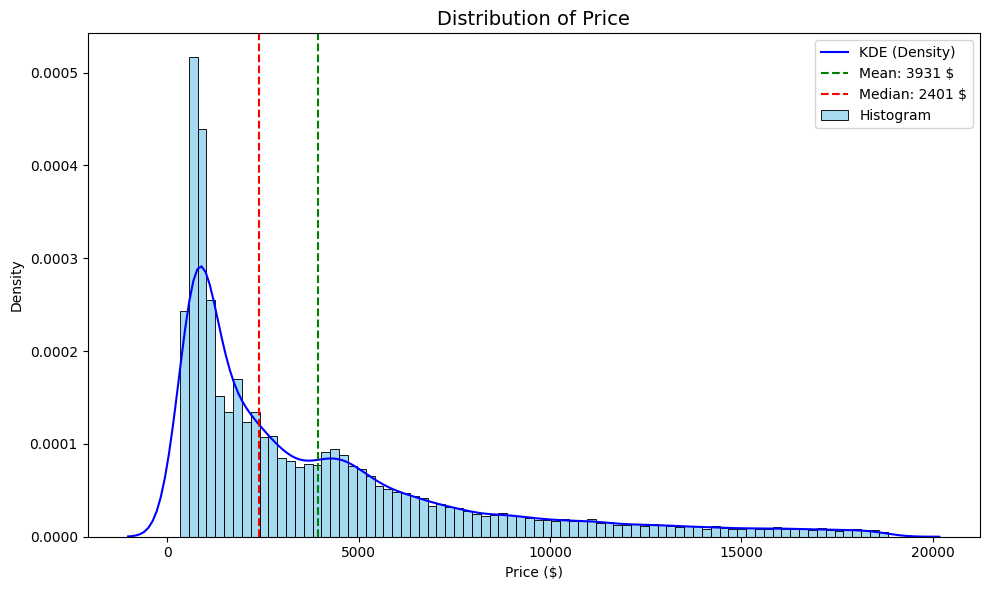

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_val = df["price"].mean()
median_val = df["price"].median()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="price", color="skyblue", stat="density", label="Histogram")
sns.kdeplot(data=df, x="price", color="blue", linewidth="1.5", label="KDE (Density)")
plt.axvline(mean_val, linestyle="--", color="green", label=f"Mean: {mean_val:.0f} $")
plt.axvline(median_val, linestyle="--", color="red", label=f"Median: {median_val:.0f} $")

plt.title("Distribution of Price", fontsize=14)
plt.legend(loc="upper right")
plt.xlabel(xlabel="Price ($)")
plt.tight_layout()
plt.show()

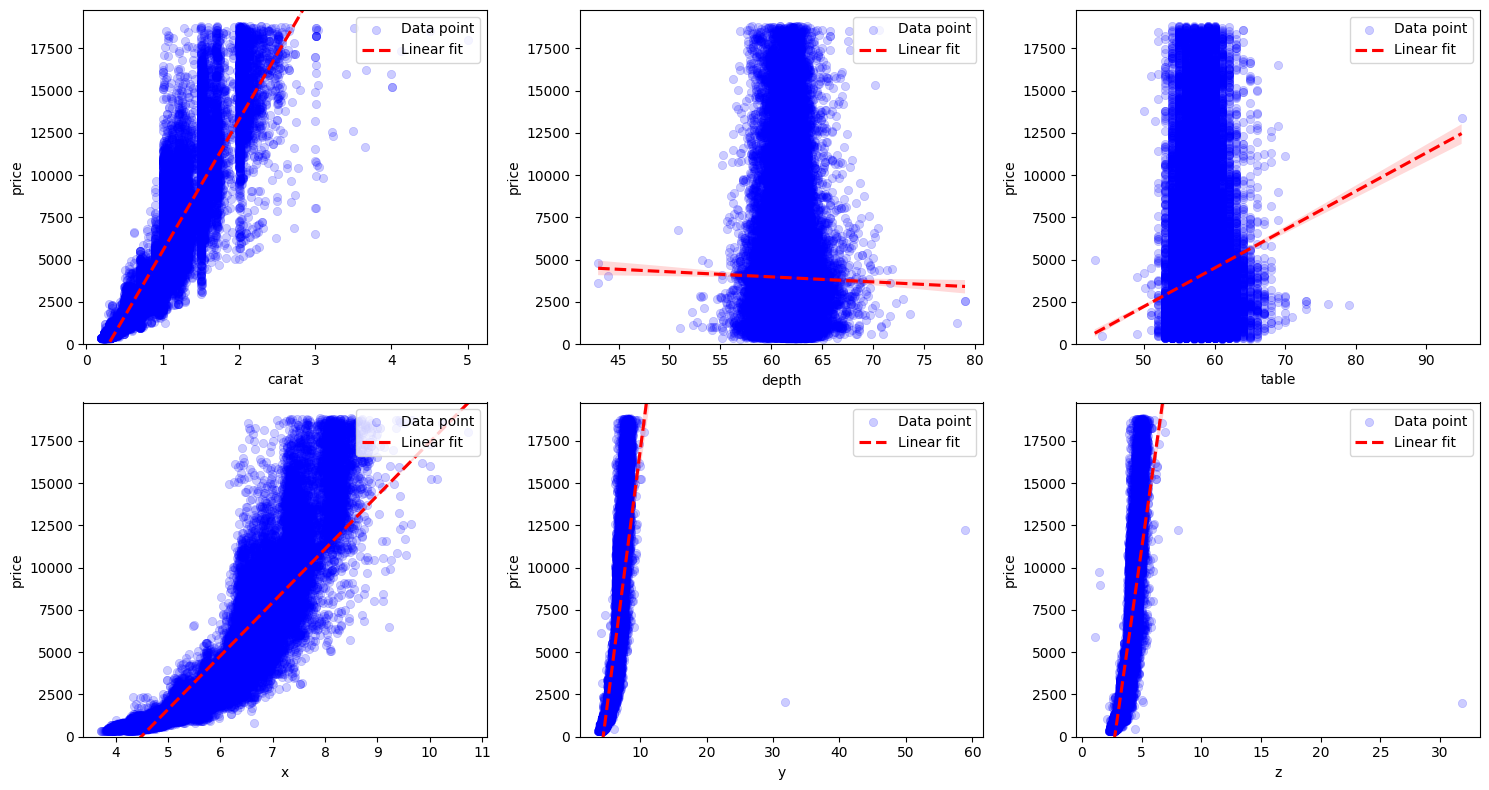

In [226]:
import math

numerical_features = ["carat", "depth", "table", "x", "y", "z"]

n_col = 3
n_row = math.ceil(len(numerical_features) / n_col)

plt.figure(figsize=(5 * n_col, 4 * n_row))

max_y_limit = df["price"].max() * 1.05

for index, feature in enumerate(numerical_features):
    plt.subplot(n_row, n_col, index + 1)
    sns.scatterplot(data=df, x=feature, y="price", color="blue", alpha= 0.2, edgecolor=None, label="Data point")
    sns.regplot(data=df, x=feature, y="price", scatter=False, color="red", line_kws={'linestyle': '--'}, label="Linear fit")

    plt.ylim(0, max_y_limit)
    plt.legend(loc="upper right")

plt.tight_layout()
plt.show()



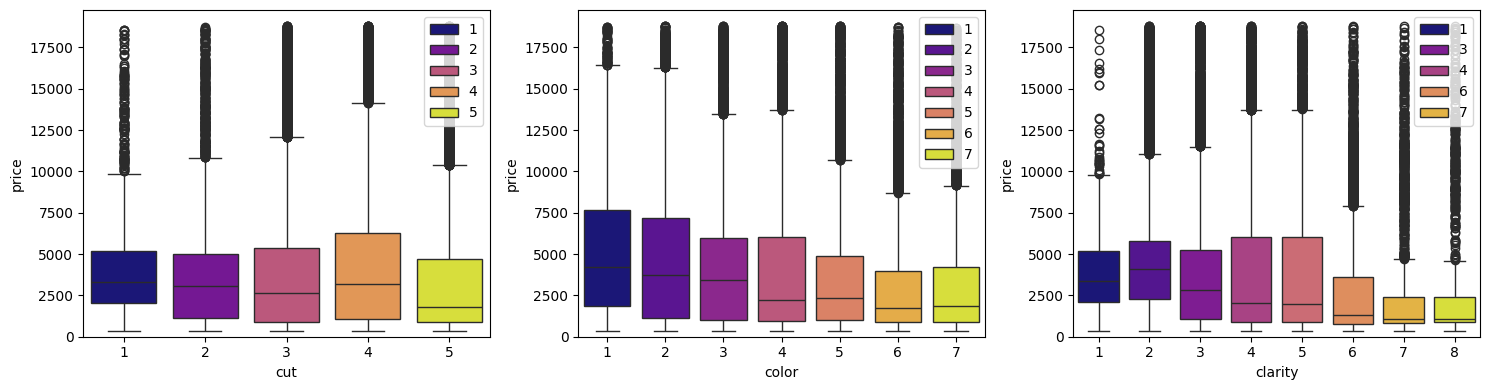

In [227]:
categorical_features = ["cut", "color", "clarity"]

n_col = 3
n_row = 1

plt.figure(figsize=(5 * n_col, 4* n_row))

max_y_limit = df["price"].max() * 1.05

for index, feature in enumerate(categorical_features):
    plt.subplot(n_row, n_col, index + 1)
    sns.boxplot(data=df, x=feature, y="price", hue=feature, palette="plasma")

    plt.ylim(0, max_y_limit)
    plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

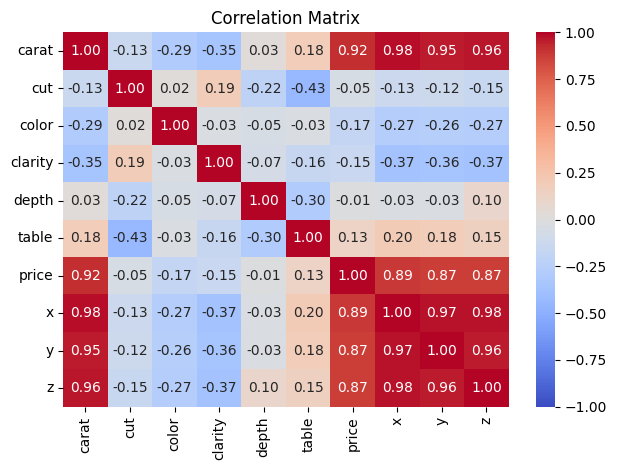

In [228]:
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, cmap="coolwarm", annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## 5. Features Engineering

In [229]:
import numpy as np
import pandas as pd

In [230]:
# Create new data from df for polynomial features
df_poly = df.copy()

In [231]:
# Log transform for right skewed price
df_poly["price_log"] = np.log1p(df_poly["price"])
df_poly = df_poly.drop(columns="price")

In [232]:
# Dimension reduction for x, y, z (which have strong correlation)
df_poly["volume"] = df_poly["x"] * df_poly["y"] * df_poly["z"]

cols_to_check = ["price_log", "x", "y", "z", "volume"]
print(df_poly[cols_to_check].corr()["price_log"])

df_poly = df_poly.drop(columns=["x", "y", "z"])

price_log    1.000000
x            0.960737
y            0.938471
z            0.941769
volume       0.901799
Name: price_log, dtype: float64


In [233]:
df_poly.head(5)

,carat,cut,color,clarity,depth,table,price_log,volume
1,0.23,5,6,2,61.5,55.0,5.789960,38.202030
2,0.21,4,6,3,59.8,61.0,5.789960,34.505856
3,0.23,2,6,5,56.9,65.0,5.793014,38.076885
4,0.29,4,2,4,62.4,58.0,5.814131,46.724580
5,0.31,2,1,2,63.3,58.0,5.817111,51.917250


In [234]:
from typing import List

def add_squared_features(data: pd.DataFrame, features: List[str]) -> pd.DataFrame:
    for feature in features:
        data[f"{feature}_sq"] = data[feature]**2
    
    return data

def add_interaction_features(data: pd.DataFrame, 
                             primary_feature: str, 
                             interaction_features: List[str]) -> pd.DataFrame:
    
    data[f"{primary_feature}_sq"] = data[primary_feature] ** 2

    for feature in interaction_features:
        data[f"{primary_feature}_x_{feature}"] = data[primary_feature] * data[feature]
        data[f"{feature}_sq"] = data[feature] ** 2
    
    return data

In [235]:
add_squared_features(df_poly, ["volume"])

,carat,cut,color,clarity,depth,table,price_log,volume,volume_sq
1,0.23,5,6,2,61.5,55.0,5.789960,38.202030,1459.395096
2,0.21,4,6,3,59.8,61.0,5.789960,34.505856,1190.654098
3,0.23,2,6,5,56.9,65.0,5.793014,38.076885,1449.849171
4,0.29,4,2,4,62.4,58.0,5.814131,46.724580,2183.186376
5,0.31,2,1,2,63.3,58.0,5.817111,51.917250,2695.400848
...,...,...,...,...,...,...,...,...,...
53936,0.72,5,7,3,60.8,57.0,7.922261,115.920000,13437.446400
53937,0.72,2,7,3,63.1,55.0,7.922261,118.110175,13950.013439
53938,0.70,3,7,3,62.8,60.0,7.922261,114.449728,13098.740239
53939,0.86,4,3,2,61.0,58.0,7.922261,140.766120,19815.100540


In [236]:
interaction_features = ["cut", "color", "clarity"]
add_interaction_features(df_poly, "carat", interaction_features)

,carat,cut,color,clarity,depth,table,price_log,volume,volume_sq,carat_sq,carat_x_cut,cut_sq,carat_x_color,color_sq,carat_x_clarity,clarity_sq
1,0.23,5,6,2,61.5,55.0,5.789960,38.202030,1459.395096,0.0529,1.15,25,1.38,36,0.46,4
2,0.21,4,6,3,59.8,61.0,5.789960,34.505856,1190.654098,0.0441,0.84,16,1.26,36,0.63,9
3,0.23,2,6,5,56.9,65.0,5.793014,38.076885,1449.849171,0.0529,0.46,4,1.38,36,1.15,25
4,0.29,4,2,4,62.4,58.0,5.814131,46.724580,2183.186376,0.0841,1.16,16,0.58,4,1.16,16
5,0.31,2,1,2,63.3,58.0,5.817111,51.917250,2695.400848,0.0961,0.62,4,0.31,1,0.62,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,5,7,3,60.8,57.0,7.922261,115.920000,13437.446400,0.5184,3.60,25,5.04,49,2.16,9
53937,0.72,2,7,3,63.1,55.0,7.922261,118.110175,13950.013439,0.5184,1.44,4,5.04,49,2.16,9
53938,0.70,3,7,3,62.8,60.0,7.922261,114.449728,13098.740239,0.4900,2.10,9,4.90,49,2.10,9
53939,0.86,4,3,2,61.0,58.0,7.922261,140.766120,19815.100540,0.7396,3.44,16,2.58,9,1.72,4
